#**ARTIFICIAL INTELLIGENCE & MACHINE LEARNING**
**Implementasi Decision Tree, Random Forest, SVM, KNN, dan Naive Bayes untuk Diagnosis Diabetes berdasarkan Demografi dan Pola Hidup Asia 2024** 

# 1. PENGUMPULAN DATA

In [195]:
import pandas as pd #library untuk menampilkan data seolah-olah seperti excel (ada kolom dan barisnya)
import numpy as np #library untuk menampilkan matriks
import matplotlib.pyplot #library untuk menampilkan histogram
from google.colab import files #library untuk mengunduh file

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path file
file_path = '/content/drive/My Drive/Data/diabetes_data.csv'

# Baca file CSV
data = pd.read_csv(file_path)

# Tampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Tampilkan data dalam bentuk tabel
data  # Dengan hanya memanggil variabel df, data akan dirender dalam bentuk tabel di Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          6000   44       0          1                    2               1   
1          6001   51       1          0                    1               2   
2          6002   89       1          0                    1               3   
3          6003   21       1          1                    1               2   
4          6004   27       1          0                    1               3   
5          6005   65       0          0                    0               0   
6          6006   61       1          2                    1               3   
7          6007   74       1          3                    0               3   
8          6008   54       0          0                    1               2   
9          6009   82       1          0                    1               1   
10         6010   59       1          0                    2               2   
11         6011   82       1          1                    1               3   
12         6012   79       1          1                    0               2   
13         6013   22       0          3                    0               2   
14         6014   29       0          0                    1               2   
15         6015   76       0          0                    1               3   
16         6016   80       0          1                    1               2   
17         6017   47       0          0                    1               0   
18         6018   67       0          3                    0               2   
19         6019   90       0          0                    0               2   
20         6020   42       1          0                    0               1   
21         6021   88       1          0                    0               1   
22         6022   51       0          0                    2               1   
23         6023   25       0          0                    0               2   
24         6024   69       0          0                    0               2   
25         6025   65       1          0                    2               1   
26         6026   87       0          0                    0               2   
27         6027   42       1          1                    1               3   
28         6028   70       0          0                    1               1   
29         6029   45       1          1                    2               1   
30         6030   82       0          1                    0               1   
31         6031   22       1          0                    1               1   
32         6032   60       1          3                    2               1   
33         6033   61       1          1                    0               3   
34         6034   24       1          0                    1               2   
35         6035   20       1          0                    1               2   
36         6036   21       1          0                    0               3   
37         6037   21       0          0                    1               2   
38         6038   62       1          1                    0               3   
39         6039   34       0          0                    0               1   
40         6040   72       1          0                    0               2   
41         6041   72       0          1                    1               2   
42         6042   51       0          0                    0               1   
43         6043   84       1          0                    2               3   
44         6044   76       1          0                    1               2   
45         6045   42       1          0                    1               3   
46         6046   44       0          0                    1               2   
47         6047   63       0          0                    1               0   
48         6048   58       0          1                    1               2   
49    

# 2. PRE-PROCESSING DATA (EKSPLORASI DATA)

In [196]:
#checking data null
data.isnull().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins                          0
AntidiabeticMedications          0
FrequentUrination                0
ExcessiveThirst                  0
UnexplainedWeightLoss            0
FatigueLevels                    0
BlurredVision                    0
SlowHealingSores                 0
TinglingHandsFeet                0
QualityOfLifeScore               0
HeavyMetalsExposure              0
OccupationalExposureChemicals    0
WaterQuality                     0
MedicalCheckupsFrequency         0
MedicationAdherence              0
HealthLiteracy                   0
Diagnosis                        0
DoctorInCharge                   0
dtype: int64

In [197]:
#checking data duplikat - data cleaning
duplicates = data[data.duplicated()]

# Jumlah data duplikat
num_duplicates = duplicates.shape[0]
print(f"Jumlah data duplikat: {num_duplicates}")

# Menampilkan data duplikat jika ada
if num_duplicates > 0:
    print("Data duplikat:")
    print(duplicates)
else:
    print("Tidak ada data duplikat.")

Jumlah data duplikat: 0
Tidak ada data duplikat.


In [198]:
#checking data type - transformasi data
data.dtypes

#tipe data object bisa diubah dalam bentuk int
#tipe data object, int float berpengaruh ke data cleaning (object bisa mengisi dengan agregasi modus | int, float bisa mengisi dengan agregasi mean)

PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolTotal                 float64
CholesterolLDL                   float64
CholesterolHDL                   float64
CholesterolTriglycerides         float64
AntihypertensiveMedications        int64
Statins                            int64
AntidiabeticMedications            int64
FrequentUrination                  int64
ExcessiveThirst                    int64
UnexplainedWeightLoss              int64
FatigueLevels                    float64
BlurredVision                      int64
SlowHealingSores                   int64
TinglingHandsFeet                  int64
QualityOfLifeScore               float64
HeavyMetalsExposure                int64
OccupationalExposureChemicals      int64
WaterQuality                       int64
MedicalCheckupsFrequency         float64
MedicationAdherence              float64
HealthLiteracy                   float64
Diagnosis                          int64
DoctorInCharge                    object
dtype: object

In [199]:
# Menghitung langsung nilai 0
count_for_0 = (data['Ethnicity'] == 0).sum()
print(count_for_0)

# Menghitung langsung nilai 1
count_for_1 = (data['Ethnicity'] == 1).sum()
print(count_for_1)

# Menghitung langsung nilai 2
count_for_2 = (data['Ethnicity'] == 2).sum()
print(count_for_2)

# Menghitung langsung nilai 3
count_for_3 = (data['Ethnicity'] == 3).sum()
print(count_for_3)

1099
357
206
217


In [200]:
pd.value_counts(data.Gender) #untuk jumlah data gender laki-laki (0) dan perempuan (1)

<ipython-input-200-2bc47249e6da>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data.Gender) #untuk jumlah data gender laki-laki (0) dan perempuan (1)


Gender
0    963
1    916
Name: count, dtype: int64

# 2. PRE-PROCESSING (DATA CLEANING)

In [201]:
#menghapus attribute patient id
data.drop('PatientID', axis=1, inplace=True)

#menghapus attribute educationlevel
data.drop('EducationLevel', axis=1, inplace=True)

#menghapus attribute heavymetalsexposure
data.drop('HeavyMetalsExposure', axis=1, inplace=True)

#menghapus attribute occupationalexposurechemicals
data.drop('OccupationalExposureChemicals', axis=1, inplace=True)

#menghapus attribute waterquality
data.drop('WaterQuality', axis=1, inplace=True)

#menghapus attribute doctorincharge
data.drop('DoctorInCharge', axis=1, inplace=True)

In [202]:
data.head()

Age  Gender  Ethnicity  SocioeconomicStatus        BMI  Smoking  \
0   44       0          1                    2  32.985284        1   
1   51       1          0                    1  39.916764        0   
2   89       1          0                    1  19.782251        0   
3   21       1          1                    1  32.376881        1   
4   27       1          0                    1  16.808600        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0            4.499365          2.443385     4.898831      4.049885   
1            1.578919          8.301264     8.941093      7.508150   
2            1.177301          6.103395     7.722543      7.708387   
3            1.714621          8.645465     4.804044      6.286548   
4           15.462549          4.629383     2.532756      9.771125   

   FamilyHistoryDiabetes  GestationalDiabetes  PolycysticOvarySyndrome  \
0                      1                    1                        0   
1                      0                    0                        0   
2                      1                    0                        0   
3                      1                    1                        0   
4                      0                    0                        0   

   PreviousPreDiabetes  Hypertension  SystolicBP  DiastolicBP  \
0                    0             0          93           73   
1                    0             0         165           99   
2                    0             0         119           91   
3                    1             0         169           87   
4                    0             0         165           69   

   FastingBloodSugar     HbA1c  SerumCreatinine  BUNLevels  CholesterolTotal  \
0         163.687162  9.283631         2.665607  28.190147        254.270670   
1         188.347070  7.326870         4.172177  32.149491        155.358831   
2         127.703653  4.083426         1.973168  10.018375        231.608922   
3          82.688415  6.516645         3.057797  44.123281        176.592374   
4          90.743395  5.607222         4.150353   7.757117        157.344121   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides  \
0       86.993627       70.801469                190.335834   
1      110.056105       39.900112                 81.172469   
2       62.035793       62.480666                279.809069   
3       68.238410       46.977819                112.751396   
4       66.476215       40.059755                381.528785   

   AntihypertensiveMedications  Statins  AntidiabeticMedications  \
0                            0        0                        1   
1                            0        0                        0   
2                            1        1                        0   
3                            0        0                        1   
4                            1        1                        0   

   FrequentUrination  ExcessiveThirst  UnexplainedWeightLoss  FatigueLevels  \
0                  0                0                      0       9.534169   
1                  0                0                      0       0.123214   
2                  0                0                      0       9.643320   
3                  0                0                      0       3.403557   
4                  0                0                      0       2.924687   

   BlurredVision  SlowHealingSores  TinglingHandsFeet  QualityOfLifeScore  \
0              0                 0                  1           73.765109   
1              0                 0                  0           91.445753   
2              0                 0                  0           54.485744   
3              0                 0                  0           77.866758   
4              0                 0                  0           37.731808   

   MedicalCheckupsFrequency  MedicationAdherence  HealthLiteracy  Diagnosis  
0                  1.782724             

# 2. PRE-PROCESSING (DATA SELECTION)

In [203]:
# Memfilter kolom ethnicity dengan nilai 2 saja
data_filter = data[data["Ethnicity"] == 2]
print(data_filter.head())

    Age  Gender  Ethnicity  SocioeconomicStatus        BMI  Smoking  \
6    61       1          2                    1  20.075147        0   
49   64       1          2                    1  33.143739        1   
51   53       0          2                    2  37.489487        0   
60   21       0          2                    1  26.771650        0   
61   35       0          2                    0  38.042209        0   

    AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
6             1.086479          8.745650     4.705480      4.317813   
49           10.477593          0.563050     5.780219      8.820418   
51           11.321812          2.222625     3.544057      7.653268   
60            1.471591          3.937365     0.315900      9.308100   
61           19.796554          8.119009     7.745161      5.737498   

    FamilyHistoryDiabetes  GestationalDiabetes  PolycysticOvarySyndrome  \
6                       0                    0                        0

In [204]:
# Memisahkan features (X) dan target (y)
X = data_filter.drop(columns=['Diagnosis'])
y = data_filter['Diagnosis']

In [205]:
# Tampilkan 5 baris pertama dari dataset X
x_head = X.head()

# Simpan data ke file Excel (.xlsx)
#file_name = "x_table.xlsx"
#x_head.to_excel(file_name, index=False, engine='openpyxl')

# Unduh file Excel
#files.download(file_name)

In [206]:
# Tampilkan 5 baris pertama dari dataset X
y_head = y.head()

# Simpan data ke file Excel (.xlsx)
#file_name = "y_head_table.xlsx"
#y_head.to_excel(file_name, index=False, engine='openpyxl')

# Unduh file Excel
#files.download(file_name)

In [207]:
X.shape

(206, 39)

In [208]:
y.shape

(206,)

# 3. MEMBANGUN MODEL MACHINE LEARNING
80(train) & 20(test)

In [209]:
#library pembagian data set metode train test split
from sklearn.model_selection import train_test_split

In [210]:
print(len(X))  # jumlah sampel features
print(len(y))    # jumlah sampel target

206
206


In [211]:
#pembagian data set yang 80(train) & 20(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
print("Ukuran x_train: ", X_train.shape)
print("Ukuran x_test: ", X_test.shape)
print("Ukuran pisah_train: ", y_train.shape)
print("Ukuran pisah_test: ", y_test.shape)

Ukuran x_train:  (164, 39)
Ukuran x_test:  (42, 39)
Ukuran pisah_train:  (164,)
Ukuran pisah_test:  (42,)


In [213]:
X_train #80%

Age  Gender  Ethnicity  SocioeconomicStatus        BMI  Smoking  \
1275   61       0          2                    0  29.375658        0   
730    74       0          2                    0  22.988936        1   
869    32       1          2                    2  15.025898        1   
290    40       0          2                    0  26.352559        0   
216    69       0          2                    2  31.258052        1   
1255   48       0          2                    1  26.244928        0   
1044   52       0          2                    1  34.546750        0   
245    73       0          2                    1  31.450728        1   
186    38       0          2                    1  39.509661        1   
1861   31       1          2                    1  20.455865        0   
1854   47       0          2                    1  37.507965        0   
1556   48       0          2                    2  32.333202        0   
834    68       1          2                    2  17.418129        0   
67     74       1          2                    2  22.553298        0   
1315   20       0          2                    1  22.104623        0   
509    65       0          2                    2  38.121176        0   
1109   29       0          2                    1  23.603218        0   
757    90       0          2                    2  28.789565        0   
1276   82       0          2                    2  24.948632        0   
920    54       0          2                    0  22.540867        1   
1597   32       0          2                    1  29.455052        0   
673    72       0          2                    1  26.434697        1   
1585   51       0          2                    2  27.790218        0   
258    24       0          2                    1  26.703536        0   
112    80       0          2                    0  19.424201        0   
269    88       1          2                    1  39.696116        1   
1120   33       0          2                    2  19.025648        0   
322    67       0          2                    1  18.666727        1   
687    83       0          2                    1  24.486254        1   
839    31       1          2                    2  27.745231        1   
1257   45       1          2                    1  17.071468        0   
404    68       1          2                    0  19.574177        0   
1051   51       0          2                    1  20.834481        0   
1529   81       0          2                    0  28.312052        0   
679    75       1          2                    0  37.821919        0   
306    71       1          2                    0  18.388611        1   
1119   35       0          2                    1  26.490274        0   
683    72       0          2                    0  29.084958        0   
1753   42       1          2                    0  31.667496        0   
235    42       0          2                    1  30.624065        0   
1234   35       1          2                    0  25.176509        0   
980    36       0          2                    0  26.738961        0   
1069   34       1          2                    0  36.552024        0   
51     53       0          2                    2  37.489487        0   
681    64       1          2                    2  36.495103        0   
344    51       0          2                    0  17.790593        0   
1106   77       0          2                    1  21.790064        0   
1178   44       1          2                    1  28.239435        1   
819    85       0          2                    1  29.004099        0   
744    61       1          2                    0  27.376328        0   
1251   22       0          2                    1  37.429991        0   
279    23       0          2                    1  15.393597        0   
1741   49       0          2                    1  39.934467        0   
552    37       0          2                    1  23.827240    

In [214]:
y_train #20%

1275    0
730     1
869     1
290     0
216     0
1255    1
1044    0
245     0
186     1
1861    1
1854    1
1556    1
834     0
67      1
1315    0
509     0
1109    0
757     0
1276    0
920     0
1597    1
673     0
1585    0
258     0
112     0
269     1
1120    1
322     0
687     1
839     0
1257    0
404     1
1051    0
1529    0
679     0
306     1
1119    0
683     0
1753    0
235     1
1234    0
980     1
1069    0
51      0
681     0
344     1
1106    1
1178    1
819     0
744     1
1251    1
279     0
1741    0
552     0
192     0
1217    0
987     1
264     0
106     0
1843    1
1493    0
72      1
239     0
1131    1
1808    0
1261    0
61      1
263     0
1024    0
1344    0
1061    0
1811    1
100     1
565     0
1074    0
1717    1
1568    0
6       0
1671    0
1407    0
644     1
1446    0
580     0
333     1
1194    1
241     0
304     0
1092    0
215     1
1390    1
1362    0
698     0
292     0
1576    0
351     0
832     1
1432    1
325     0
1268    1
60      1
921     1
438     1
1180    1
1678    0
1454    0
1720    0
386     0
689     1
265     0
94      1
1016    1
821     0
713     0
1653    0
1679    0
810     0
95      1
119     0
534     1
1593    0
1173    1
163     0
664     1
1643    0
1192    0
1574    0
1699    0
567     0
466     0
956     0
396     1
1849    0
1544    1
532     0
364     0
794     0
191     1
524     0
1439    1
1810    1
1142    0
283     0
1405    0
1744    0
49      1
423     1
1334    0
1160    1
1357    1
913     0
878     1
1054    0
761     0
669     1
1083    1
1863    1
187     0
1693    0
655     0
953     1
126     0
826     0
1601    1
907     1
Name: Diagnosis, dtype: int64

# 3. PEMODELAN (DECISION TREE)

In [215]:
from sklearn import tree

In [216]:
# Initialize Model Pengujjian
dt_model = tree.DecisionTreeClassifier()

# Train the model
dt_model = dt_model.fit(X_train, y_train)

In [217]:
# Make predictions
dt_prediksi = dt_model.predict(X_test)

In [218]:
prediksi = pd.DataFrame(dt_prediksi)
prediksi.columns = ['hasil prediksi']

In [219]:
print(prediksi)

    hasil prediksi
0                0
1                0
2                0
3                0
4                1
5                1
6                0
7                1
8                0
9                0
10               1
11               0
12               0
13               0
14               1
15               0
16               0
17               0
18               1
19               1
20               0
21               1
22               0
23               1
24               0
25               1
26               0
27               0
28               1
29               0
30               1
31               0
32               1
33               1
34               0
35               0
36               0
37               0
38               1
39               0
40               0
41               0


In [220]:
dt_data = pd.DataFrame(y_test)

In [221]:
print(dt_data)

      Diagnosis
154           0
96            0
1844          0
712           0
632           0
847           1
1628          0
1482          1
1331          0
1660          0
903           0
1494          0
588           0
1588          0
666           1
828           0
175           0
1377          0
1231          0
1520          1
548           0
1319          0
889           0
249           1
219           0
159           1
1583          0
1665          0
1735          1
1749          0
616           0
1089          0
1539          1
1380          1
1039          0
641           0
1037          1
482           1
336           1
1363          0
1064          0
606           0


In [222]:
prediksi.reset_index(drop = True, inplace = True)
dt_data.reset_index(drop = True, inplace = True)
data2 = pd.concat([prediksi, dt_data], axis = 1)

In [223]:
print(data2)

    hasil prediksi  Diagnosis
0                0          0
1                0          0
2                0          0
3                0          0
4                1          0
5                1          1
6                0          0
7                1          1
8                0          0
9                0          0
10               1          0
11               0          0
12               0          0
13               0          0
14               1          1
15               0          0
16               0          0
17               0          0
18               1          0
19               1          1
20               0          0
21               1          0
22               0          0
23               1          1
24               0          0
25               1          1
26               0          0
27               0          0
28               1          1
29               0          0
30               1          0
31               0          0
32        

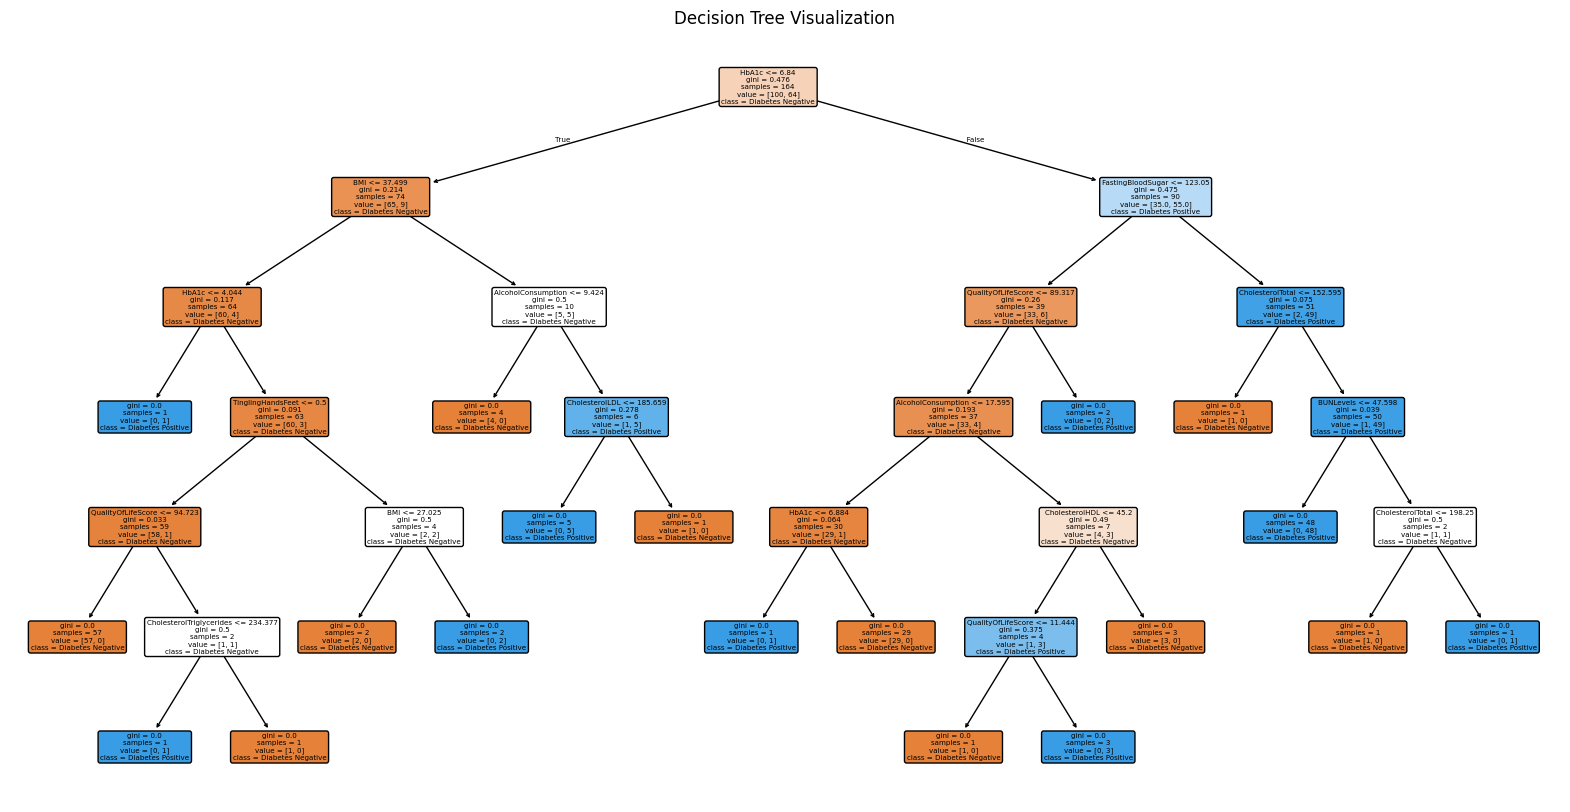

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [224]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from google.colab import files

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))  # Menentukan ukuran plot
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['Diabetes Negative', 'Diabetes Positive'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")

# Simpan gambar ke file
file_name = "decision_tree_visualization.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi
plt.show()

# Unduh file gambar
files.download(file_name)


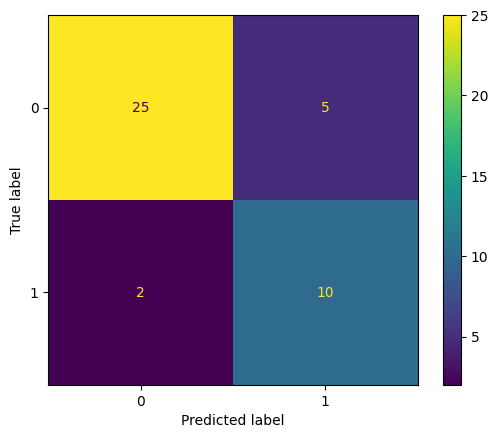

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [225]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, prediksi)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Simpan gambar ke file
file_name = "confusion matrix decision tree.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi
plt.show()

# Unduh file gambar
files.download(file_name)

In [226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, prediksi)
precision = precision_score(y_test, prediksi, average='weighted')
recall = recall_score(y_test, prediksi, average='weighted')
f1 = f1_score(y_test, prediksi, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:\n")
print(classification_report(y_test, prediksi))


Accuracy: 0.83
Precision: 0.85
Recall: 0.83
F1-Score: 0.84

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.67      0.83      0.74        12

    accuracy                           0.83        42
   macro avg       0.80      0.83      0.81        42
weighted avg       0.85      0.83      0.84        42



# 3. PEMODELAN (RANDOM FOREST)

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model = model.fit(X_train, y_train)

In [229]:
prediksi = model.predict(X_test)

In [230]:
prediksi4 = pd.DataFrame(prediksi)
prediksi4.columns = ['hasil prediksi']

In [231]:
print(prediksi4)

    hasil prediksi
0                0
1                0
2                0
3                0
4                1
5                0
6                0
7                1
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               1
20               0
21               0
22               0
23               1
24               0
25               1
26               0
27               0
28               1
29               0
30               1
31               0
32               1
33               1
34               0
35               0
36               0
37               0
38               1
39               0
40               0
41               0


In [232]:
data9 = pd.DataFrame(y_test)

In [233]:
print(data9)

      Diagnosis
154           0
96            0
1844          0
712           0
632           0
847           1
1628          0
1482          1
1331          0
1660          0
903           0
1494          0
588           0
1588          0
666           1
828           0
175           0
1377          0
1231          0
1520          1
548           0
1319          0
889           0
249           1
219           0
159           1
1583          0
1665          0
1735          1
1749          0
616           0
1089          0
1539          1
1380          1
1039          0
641           0
1037          1
482           1
336           1
1363          0
1064          0
606           0


In [234]:
prediksi4.reset_index(drop = True, inplace = True)
data9.reset_index(drop = True, inplace = True)
data10 = pd.concat([prediksi4, data9], axis = 1)

In [235]:
print(data10)

    hasil prediksi  Diagnosis
0                0          0
1                0          0
2                0          0
3                0          0
4                1          0
5                0          1
6                0          0
7                1          1
8                0          0
9                0          0
10               0          0
11               0          0
12               0          0
13               0          0
14               0          1
15               0          0
16               0          0
17               0          0
18               0          0
19               1          1
20               0          0
21               0          0
22               0          0
23               1          1
24               0          0
25               1          1
26               0          0
27               0          0
28               1          1
29               0          0
30               1          0
31               0          0
32        

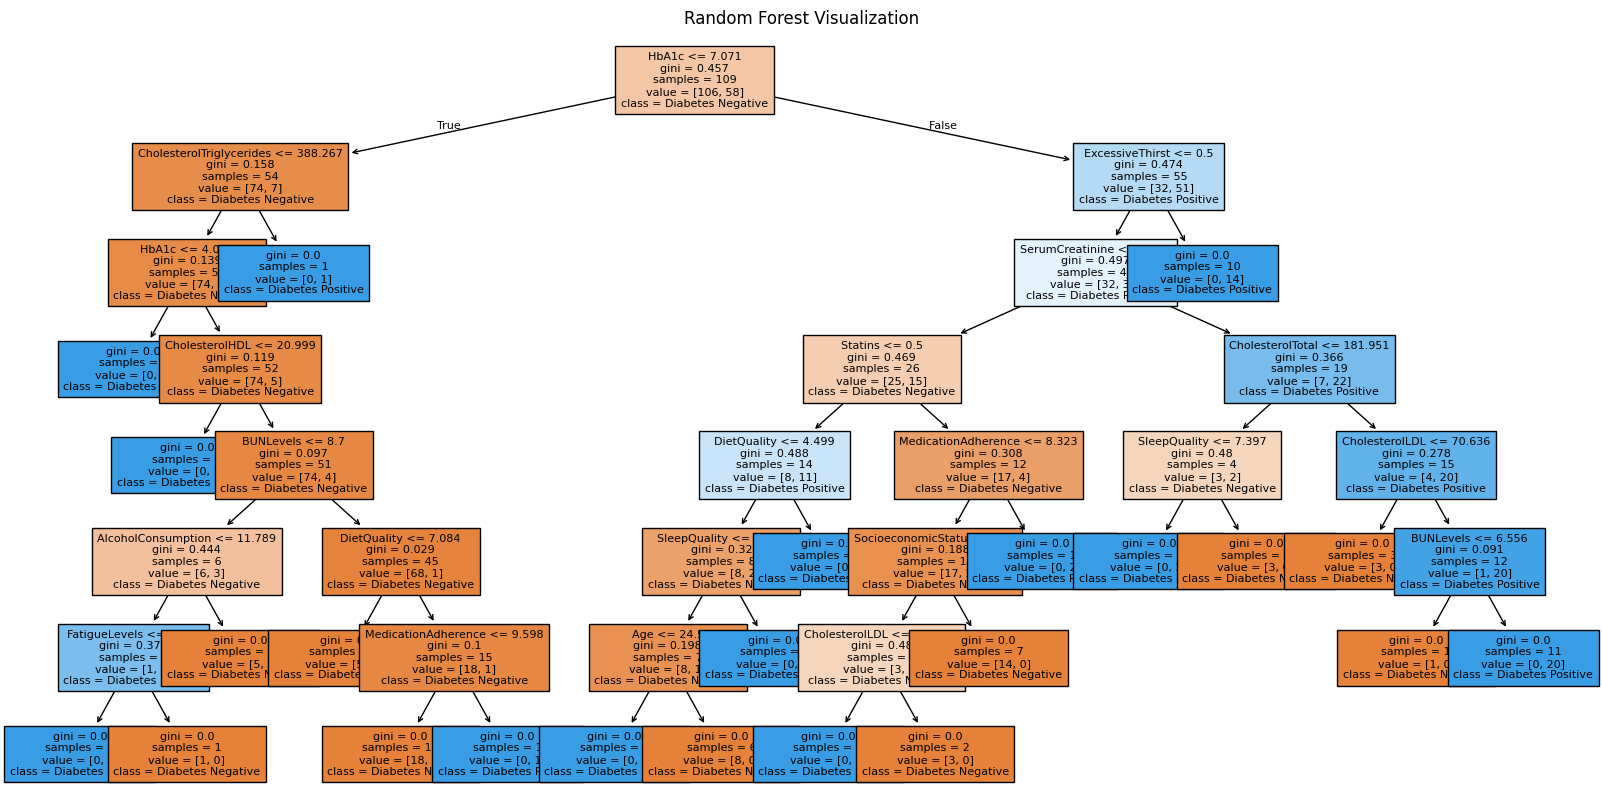

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [236]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from google.colab import files

# Extract one of the trees from the Random Forest
single_tree = model.estimators_[0]  # Selecting the first tree

# Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train.columns,
          class_names=['Diabetes Negative', 'Diabetes Positive'], fontsize=8)
plt.title("Random Forest Visualization")
tree_visualization_file = "random_forest_tree_visualization.png"
plt.savefig(tree_visualization_file, bbox_inches='tight', dpi=300)  # Save the figure as a PNG file
plt.show()

# Download the saved image
files.download(tree_visualization_file)


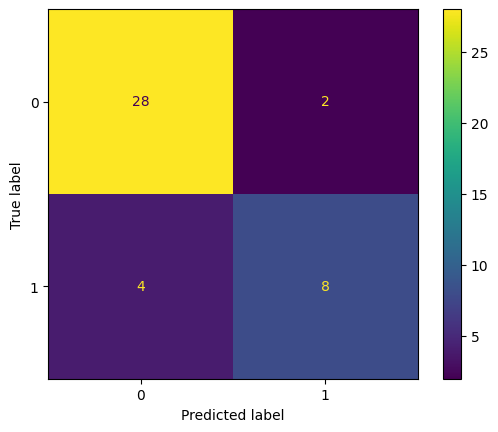

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [237]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, prediksi4)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Simpan gambar ke file
file_name = "confusion matrix random forest.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi
plt.show()

# Unduh file gambar
files.download(file_name)

In [238]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, prediksi4)
precision = precision_score(y_test, prediksi4, average='weighted')
recall = recall_score(y_test, prediksi4, average='weighted')
f1 = f1_score(y_test, prediksi4, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:\n")
print(classification_report(y_test, prediksi4))


Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1-Score: 0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.80      0.67      0.73        12

    accuracy                           0.86        42
   macro avg       0.84      0.80      0.82        42
weighted avg       0.85      0.86      0.85        42



# 3. PEMODELAN (SVM)

In [239]:
from sklearn.svm import SVC

In [240]:
#model pengujian svm
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [241]:
svm_prediksi = svm_model.predict(X_test)

In [242]:
prediksi1 = pd.DataFrame(svm_prediksi)
prediksi1.columns = ['hasil prediksi']

In [243]:
print(prediksi1)

    hasil prediksi
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21               0
22               0
23               0
24               0
25               0
26               0
27               0
28               0
29               0
30               0
31               0
32               0
33               0
34               0
35               0
36               0
37               0
38               0
39               0
40               0
41               0


In [244]:
svm_data = pd.DataFrame(y_test)

In [245]:
print(svm_data)

      Diagnosis
154           0
96            0
1844          0
712           0
632           0
847           1
1628          0
1482          1
1331          0
1660          0
903           0
1494          0
588           0
1588          0
666           1
828           0
175           0
1377          0
1231          0
1520          1
548           0
1319          0
889           0
249           1
219           0
159           1
1583          0
1665          0
1735          1
1749          0
616           0
1089          0
1539          1
1380          1
1039          0
641           0
1037          1
482           1
336           1
1363          0
1064          0
606           0


In [246]:
prediksi1.reset_index(drop = True, inplace = True)
svm_data.reset_index(drop = True, inplace = True)
data4 = pd.concat([prediksi1, svm_data], axis = 1)

In [247]:
print(data4)

    hasil prediksi  Diagnosis
0                0          0
1                0          0
2                0          0
3                0          0
4                0          0
5                0          1
6                0          0
7                0          1
8                0          0
9                0          0
10               0          0
11               0          0
12               0          0
13               0          0
14               0          1
15               0          0
16               0          0
17               0          0
18               0          0
19               0          1
20               0          0
21               0          0
22               0          0
23               0          1
24               0          0
25               0          1
26               0          0
27               0          0
28               0          1
29               0          0
30               0          0
31               0          0
32        

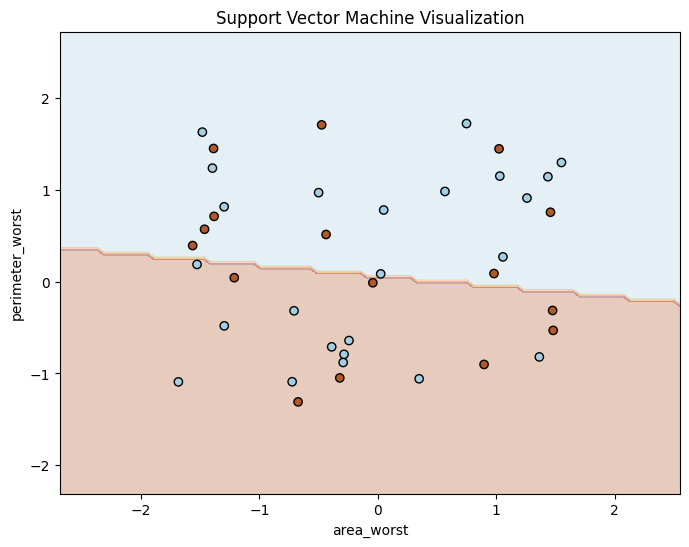

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate sample dataset
np.random.seed(42)
X = pd.DataFrame(np.random.rand(200, 2) * 100, columns=['area_worst', 'perimeter_worst'])
y = np.random.choice([0, 1], size=200)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    # Create meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict on grid
    grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')

    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_test, y_test, "Support Vector Machine Visualization")

# Simpan gambar ke file
file_name = "svm_visualization.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi

# Show plot
plt.show()

# If you want to download the image (make sure your environment supports file download):
files.download(file_name)


Length of y_test: 40, Length of prediksi1: 42
Adjusted Length of y_test: 40, Length of prediksi1: 40


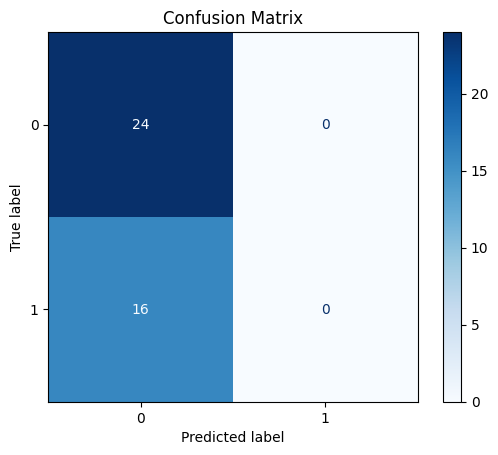

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [249]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Pastikan y_test dan prediksi1 memiliki panjang yang sama
# Cek panjang data
print(f"Length of y_test: {len(y_test)}, Length of prediksi1: {len(prediksi1)}")

# Reset index jika berbentuk DataFrame
if hasattr(y_test, "reset_index"):
    y_test = y_test.reset_index(drop=True)
if hasattr(prediksi1, "reset_index"):
    prediksi1 = prediksi1.reset_index(drop=True)

# Potong data agar panjangnya sama
min_length = min(len(y_test), len(prediksi1))
y_test = y_test[:min_length]

# Jika prediksi1 adalah DataFrame, ambil kolom prediksi sebagai array
if isinstance(prediksi1, pd.DataFrame):
    prediksi1 = prediksi1['hasil prediksi'][:min_length].to_numpy()
else:
    prediksi1 = np.array(prediksi1[:min_length])

# Pastikan keduanya memiliki panjang yang sama
print(f"Adjusted Length of y_test: {len(y_test)}, Length of prediksi1: {len(prediksi1)}")

# Generate confusion matrix
cm = confusion_matrix(y_test, prediksi1)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues)

# Simpan gambar ke file terlebih dahulu
file_name = "confusion_matrix_svm.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi

# Show the plot
plt.title("Confusion Matrix")
plt.show()

# Unduh file gambar (pastikan environment mendukung file download)
files.download(file_name)


In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, prediksi1)
precision = precision_score(y_test, prediksi1, average='weighted')
recall = recall_score(y_test, prediksi1, average='weighted')
f1 = f1_score(y_test, prediksi1, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:\n")
print(classification_report(y_test, prediksi1))


Accuracy: 0.60
Precision: 0.36
Recall: 0.60
F1-Score: 0.45

Classification Report:

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        24
           1       0.00      0.00      0.00        16

    accuracy                           0.60        40
   macro avg       0.30      0.50      0.38        40
weighted avg       0.36      0.60      0.45        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# 3. PEMODELAN (KNN)

In [251]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
# Inisialisasi model KNN dengan jumlah tetangga
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)

In [253]:
prediksi = model.predict(X_test)

In [254]:
prediksi2 = pd.DataFrame(prediksi)
prediksi2.columns = ['hasil prediksi']

In [255]:
print(prediksi2)

    hasil prediksi
0                1
1                1
2                1
3                0
4                1
5                1
6                0
7                0
8                0
9                1
10               1
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               1
20               0
21               1
22               1
23               1
24               1
25               1
26               1
27               0
28               0
29               0
30               1
31               0
32               1
33               0
34               1
35               0
36               1
37               1
38               1
39               1


In [256]:
data5 = pd.DataFrame(y_test)

In [257]:
print(data5)

    0
0   1
1   0
2   0
3   1
4   1
5   1
6   1
7   1
8   1
9   0
10  0
11  1
12  0
13  0
14  1
15  1
16  0
17  0
18  0
19  0
20  0
21  0
22  1
23  0
24  0
25  1
26  1
27  1
28  0
29  0
30  0
31  1
32  0
33  0
34  0
35  0
36  0
37  0
38  0
39  1


In [258]:
prediksi2.reset_index(drop = True, inplace = True)
data5.reset_index(drop = True, inplace = True)
data6 = pd.concat([prediksi2, data5], axis = 1)

In [259]:
print(data6)

    hasil prediksi  0
0                1  1
1                1  0
2                1  0
3                0  1
4                1  1
5                1  1
6                0  1
7                0  1
8                0  1
9                1  0
10               1  0
11               0  1
12               0  0
13               0  0
14               0  1
15               0  1
16               0  0
17               0  0
18               0  0
19               1  0
20               0  0
21               1  0
22               1  1
23               1  0
24               1  0
25               1  1
26               1  1
27               0  1
28               0  0
29               0  0
30               1  0
31               0  1
32               1  0
33               0  0
34               1  0
35               0  0
36               1  0
37               1  0
38               1  0
39               1  1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Figure saved as 'knn_decision_boundary_visualization.png'.


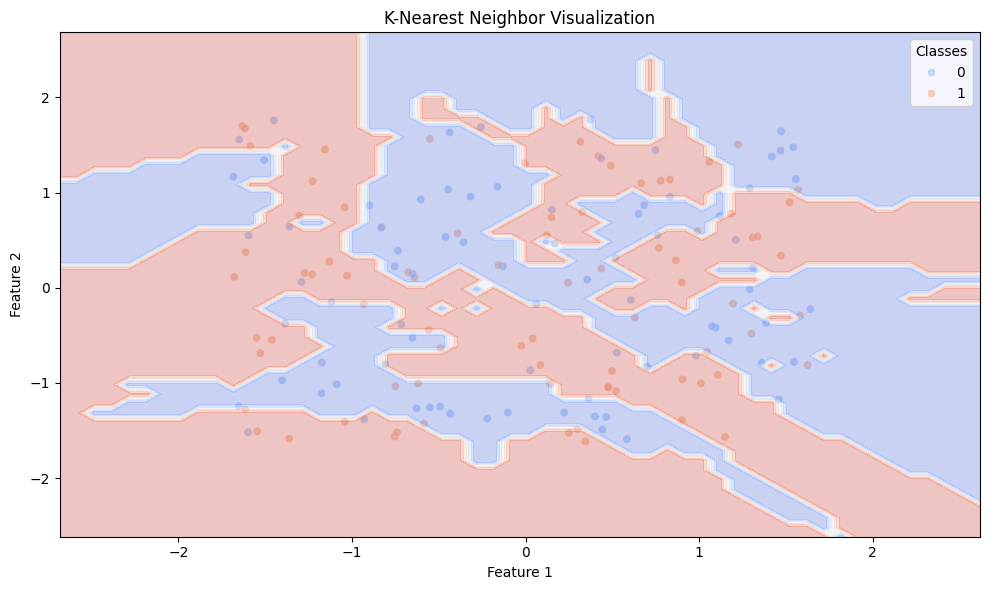

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files  # Required for file downloading in Google Colab

# Contoh pemodelan KNN (gunakan data dan model yang relevan)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Pastikan X_train memiliki dua fitur (dimensi 2)
if X_train.shape[1] == 2:
    plt.figure(figsize=(10, 6))  # Explicitly create the figure

    # Buat scatter plot data latih
    sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette="coolwarm", alpha=0.7)

    # Buat decision boundary
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict decision boundary
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("K-Nearest Neighbor Visualization")
    plt.legend(title="Classes", loc="upper right")
    plt.tight_layout()

    # Save the figure to a file (ensure the image is saved correctly)
    file_name = "knn_decision_boundary_visualization.png"
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    print(f"Figure saved as '{file_name}'.")

    # Show the plot
    plt.show()

    # Download the saved image (for Google Colab or Jupyter Notebooks)
    files.download(file_name)  # This triggers the download of the image file
else:
    print("Data tidak berdimensi dua. Decision boundary tidak dapat divisualisasikan.")


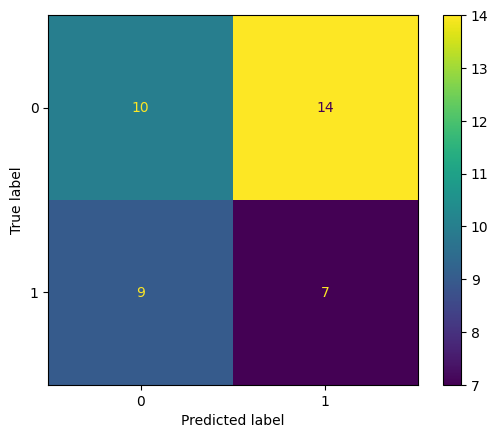

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [261]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, prediksi2)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Simpan gambar ke file
file_name = "confusionmatrix knn.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi
plt.show()

# Unduh file gambar
files.download(file_name)

In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, prediksi2)
precision = precision_score(y_test, prediksi2, average='weighted')
recall = recall_score(y_test, prediksi2, average='weighted')
f1 = f1_score(y_test, prediksi2, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:\n")
print(classification_report(y_test, prediksi2))


Accuracy: 0.42
Precision: 0.45
Recall: 0.42
F1-Score: 0.43

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.42      0.47        24
           1       0.33      0.44      0.38        16

    accuracy                           0.42        40
   macro avg       0.43      0.43      0.42        40
weighted avg       0.45      0.42      0.43        40



# 3. PEMODELAN (NAIVE BAYES)

In [263]:
from sklearn.naive_bayes import GaussianNB

In [264]:
model = GaussianNB()
model = model.fit(X_train, y_train)

In [265]:
prediksi = model.predict(X_test)

In [266]:
prediksi3 = pd.DataFrame(prediksi)
prediksi3.columns = ['hasil prediksi']

In [267]:
print(prediksi3)

    hasil prediksi
0                0
1                1
2                1
3                1
4                0
5                0
6                0
7                1
8                0
9                1
10               1
11               0
12               0
13               0
14               1
15               1
16               0
17               0
18               0
19               0
20               0
21               0
22               1
23               0
24               1
25               0
26               1
27               1
28               1
29               0
30               1
31               1
32               1
33               1
34               1
35               1
36               0
37               1
38               1
39               1


In [268]:
data7 = pd.DataFrame(y_test)

In [269]:
print(data7)

    0
0   1
1   0
2   0
3   1
4   1
5   1
6   1
7   1
8   1
9   0
10  0
11  1
12  0
13  0
14  1
15  1
16  0
17  0
18  0
19  0
20  0
21  0
22  1
23  0
24  0
25  1
26  1
27  1
28  0
29  0
30  0
31  1
32  0
33  0
34  0
35  0
36  0
37  0
38  0
39  1


In [270]:
prediksi3.reset_index(drop = True, inplace = True)
data7.reset_index(drop = True, inplace = True)
data8 = pd.concat([prediksi3, data7], axis = 1)

In [271]:
print(data8)

    hasil prediksi  0
0                0  1
1                1  0
2                1  0
3                1  1
4                0  1
5                0  1
6                0  1
7                1  1
8                0  1
9                1  0
10               1  0
11               0  1
12               0  0
13               0  0
14               1  1
15               1  1
16               0  0
17               0  0
18               0  0
19               0  0
20               0  0
21               0  0
22               1  1
23               0  0
24               1  0
25               0  1
26               1  1
27               1  1
28               1  0
29               0  0
30               1  0
31               1  1
32               1  0
33               1  0
34               1  0
35               1  0
36               0  0
37               1  0
38               1  0
39               1  1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


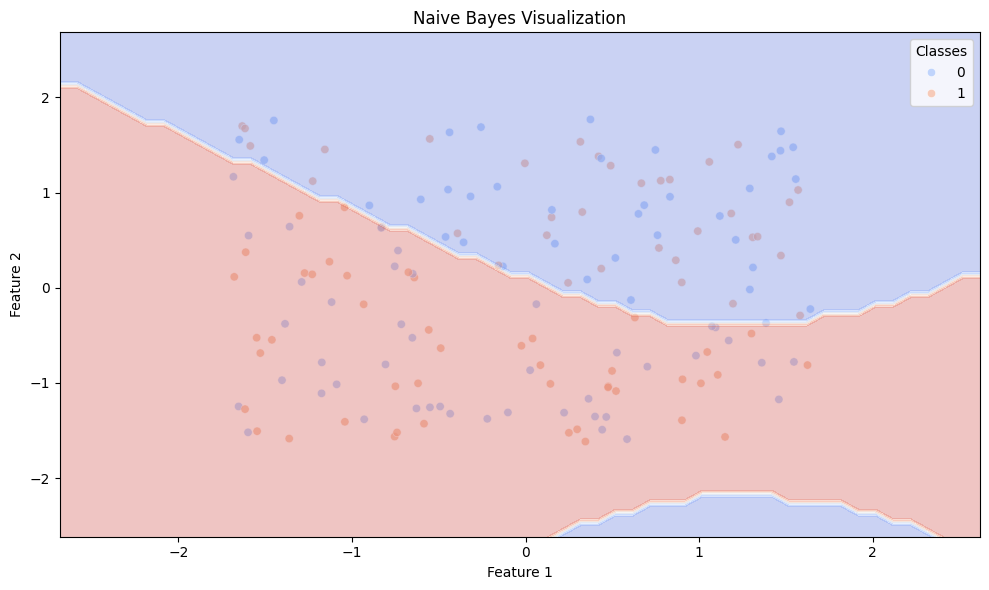

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Visualisasi hanya jika data berdimensi dua
if X_train.shape[1] == 2:
    plt.figure(figsize=(10, 6))

    # Scatter plot data latih
    sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette="coolwarm", alpha=0.7)

    # Plot decision boundary
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualisasi decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.title("Naive Bayes Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Classes", loc="upper right")
    plt.tight_layout()

    # Simpan dan tampilkan gambar
    decision_boundary_file = "naive_bayes_decision_boundary.png"
    plt.savefig(decision_boundary_file, dpi=300, bbox_inches='tight')
    plt.show()

    # Unduh gambar scatter plot dan decision boundary
    files.download(decision_boundary_file)
else:
    print("Feature space is not two-dimensional; cannot plot decision boundary.")

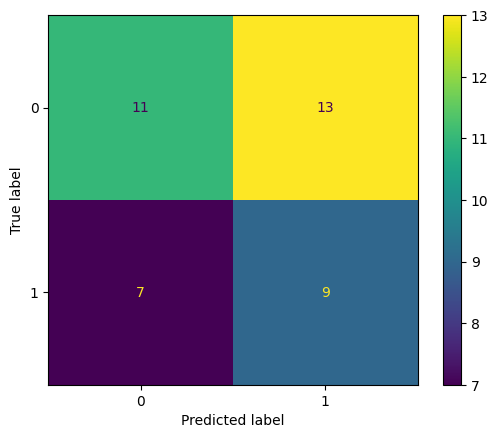

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [273]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, prediksi3)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Simpan gambar ke file
file_name = "confusion matrix naive bayes.png"
plt.savefig(file_name, bbox_inches='tight', dpi=300)  # Menyimpan gambar dengan resolusi tinggi
plt.show()

# Unduh file gambar
files.download(file_name)

In [274]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, prediksi3)
precision = precision_score(y_test, prediksi3, average='weighted')
recall = recall_score(y_test, prediksi3, average='weighted')
f1 = f1_score(y_test, prediksi3, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:\n")
print(classification_report(y_test, prediksi3))


Accuracy: 0.50
Precision: 0.53
Recall: 0.50
F1-Score: 0.50

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.46      0.52        24
           1       0.41      0.56      0.47        16

    accuracy                           0.50        40
   macro avg       0.51      0.51      0.50        40
weighted avg       0.53      0.50      0.50        40

